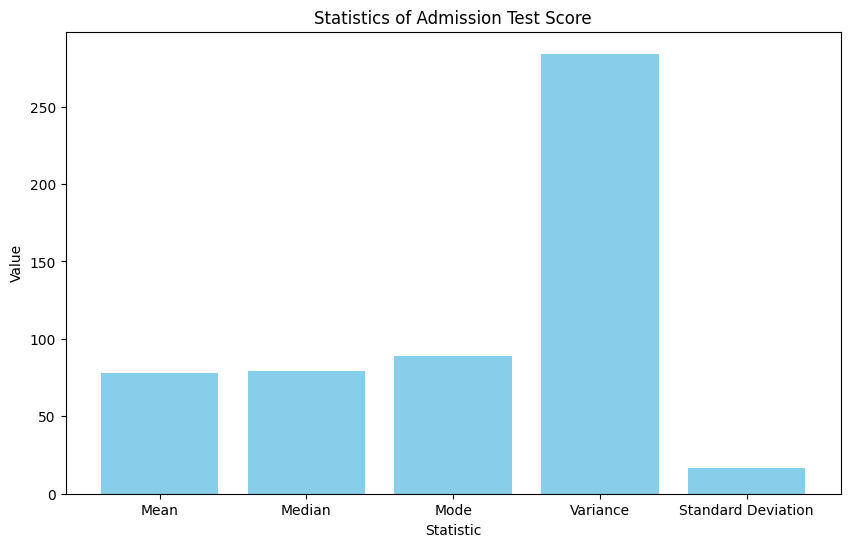

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Load the data from an Excel file
file_path = '/content/student_admission_record_dirty.xlsx'
data = pd.read_excel(file_path)

# Function to calculate statistics
def calculate_statistics(column):
    mean = column.mean()
    median = column.median()
    mode = column.mode()[0] if not column.mode().empty else None
    variance = column.var()
    std_dev = column.std()
    return mean, median, mode, variance, std_dev

# Filter valid numerical data (ignoring any non-numeric or NaN values)
filtered_data = data['Admission Test Score'].dropna()

# Calculate statistics for the Admission Test Score column
mean, median, mode, variance, std_dev = calculate_statistics(filtered_data)

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Variance', 'Standard Deviation'],
    'Value': [mean, median, mode, variance, std_dev]
})

# Plot the statistics
plt.figure(figsize=(10, 6))
plt.bar(stats_df['Statistic'], stats_df['Value'], color='skyblue')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Statistics of Admission Test Score')
plt.show()

# Save statistics back to Excel
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    stats_df.to_excel(writer, sheet_name='Statistics', index=False)


# New Section